# Dudas extras!

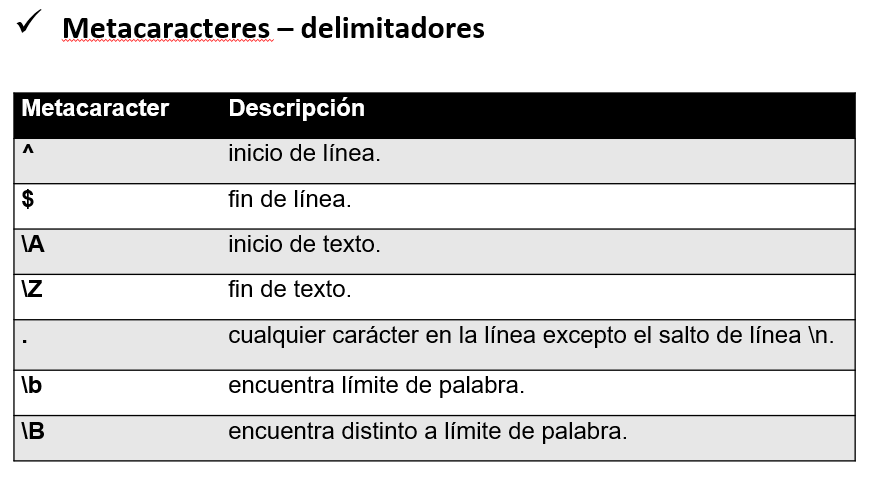

foob.*r     encuentra cadenas como 'foobar', 'foobalkjdflkj9r' y 'foobr'  {0,}

foob.+r     encuentra cadenas como 'foobar', 'foobalkjdflkj9r' pero no 'foobr'  {1,}

foob.?r     encuentra cadenas como 'foobar', 'foobbr' y 'foobr' pero no 'foobalkj9r'   {0,1}

re — Operaciones con expresiones regulares: https://docs.python.org/es/3/library/re.html

Tabla de Caracteres Unicode: https://unicode-table.com/es/#basic-latin


In [11]:
import re

In [12]:
re.findall(r'foob.*r', 'ggfoobalkjrdflkj9rdd') 

['foobalkjrdflkj9r']

In [13]:
re.findall(r'foob(?:r|.*)', 'ggfoobalkjrdflkj9rdd') 

['foobalkjrdflkj9rdd']

### Probando caracteres

In [14]:
txt = 'ggfoobálkjrdflkj9dd'
re.findall(r'foob[a-z]*r', txt) 

[]

In [15]:
re.findall(r'foob\w*r', txt) 

['foobálkjr']

In [16]:
re.findall(r'foob.*r', txt) 

['foobálkjr']

In [11]:
# Validando una URL
url = re.compile(r"^(https?:\/\/)?([\da-z\.-]+)\.([a-z\.]{2,6})([\/\w \.-]*)*\/?$")

In [ ]:
^
(https?:\/\/)?
([\da-z\.-]+)      # www.9f-.3fgd    [ \d , a-z, . , -]
# 9f-.3efgd.www
# cykpay-assets.s3.us-east-2.amazonaws.com
# ([\da-z\.-])   # w
\.([a-z\.]{2,6})  # .co   .com.mx   .edu.ar    .com
([\/\w \.-]*)*\/?
$

# cykpay-assets.s3.us-east-2.amazonaws.com/un/archivo.html

In [12]:
# vemos que https://relopezbriega.com.ar lo acepta como una url válida.
url.search("https://relopezbriega.com.ar")

<re.Match object; span=(0, 28), match='https://relopezbriega.com.ar'>

In [4]:
# pero https://google.com/un/archivo!.html no la acepta por el carcter !
print(url.search("https://google.com/un/archivo!.html"))

None


In [13]:
print(url.search("cykpay-assets.s3.us-east-2.amazonaws.com/un/archivo.html"))

<re.Match object; span=(0, 56), match='cykpay-assets.s3.us-east-2.amazonaws.com/un/archi>


In [24]:
# Validando una fecha
p1_fecha = re.compile(r'^(0?[1-9]|[12][0-9]|3[01])/(0?[1-9]|1[012])/((19|20)\d\d)$')

In [ ]:
 dd d / mm m / aaaa

^
(0?[1-9]|[12][0-9]|3[01])    # dia 01 3  10 al 29  30 31   dd d
/ 
(0?[1-9]|1[012])    # mes 7 08 10 11 12
/
((19|20)\d\d)  # año aaaa década de los años 1900 y 2000
$

In [25]:
# validando 13/02/1982
p1_fecha.search("13/02/1982")

<re.Match object; span=(0, 10), match='13/02/1982'>

In [26]:
# no valida 13-02-1982
print(p1_fecha.search("13-02-1982"))

# tendríamos que añadir [/-] (/|-)

None


In [27]:
# no valida 32/12/2015
print(p1_fecha.search("32/12/2015"))

None


In [28]:
# no valida 30/14/2015
print(p1_fecha.search("30/14/2015"))

None


In [29]:
print(p1_fecha.search("30/02/2015"))

<re.Match object; span=(0, 10), match='30/02/2015'>


In [30]:
print(p1_fecha.search("29/02/2015"))

<re.Match object; span=(0, 10), match='29/02/2015'>


In [31]:
print(p1_fecha.search("31/04/2015"))

<re.Match object; span=(0, 10), match='31/04/2015'>


### Caso de estudio: Expresiones regulares para fechas
#### Variaciones de fechas para 23 de Octubre de 2002

In [40]:
dateStr = """23-10-002
23-10-2002
23/10/2002
23/10/02
10/23/2002
23 Oct 2002
23 oct 2002
23 de Octubre de 2002
Oct 23, 2002
Octubre 23, 2002
"""
print(dateStr)

23-10-002
23-10-2002
23/10/2002
23/10/02
10/23/2002
23 Oct 2002
23 oct 2002
23 de Octubre de 2002
Oct 23, 2002
Octubre 23, 2002



1. A partir del patrón anterior, verificar si cada una de las fechas dadas cumplen o no con el mismo

In [33]:
for ds in re.split(r'\n', dateStr):
    print(p1_fecha.search(ds))

None
None
<re.Match object; span=(0, 10), match='23/10/2002'>
None
None
None
None
None
None
None


2. Realice una expresión regular que extraiga las fechas con formatos numéricos:

23-10-002   23-10-2002      23/10/2002    23/10/02     10/23/2002

In [34]:
re.findall('\d{2}[/-]\d{2}[/-]\d{2,4}', dateStr)

['23-10-002', '23-10-2002', '23/10/2002', '23/10/02', '10/23/2002']

3. Encuentre todas las fechas escritas en formato donde el mes aparece no numérico

In [35]:
# agregamos alternancia
re.findall('\d{2} (Ene|Feb|Mar|Abr|May|Jun|Jul|Ago|Sep|Oct|Nov|Dic) \d{4}', dateStr)

['Oct']

In [36]:
# Se agrega ?: para que no capture el grupo
re.findall('\d{2} (?:Ene|Feb|Mar|Abr|May|Jun|Jul|Ago|Sep|Oct|Nov|Dic) \d{4}', dateStr) 

['23 Oct 2002']

<b>(?:...)</b> significa un conjunto de paréntesis de agrupación que no captura

Normalmente, cuando escribes <b>(...)</b> en una regex, "captura" el material coincidente. Cuando usa la versión sin captura, no captura. Puede obtener las diversas partes que coinciden con la regex utilizando los métodos en el paquete <b>re</b> después de que la regex coincide con una cadena en particular

In [41]:
# agregamos la palabra "de" opcional
re.findall('\d{2} (?:de )?(?:Ene|Feb|Mar|Abr|May|Jun|Jul|Ago|Sep|Oct|Nov|Dic)[a-z]* (?:de )?\d{4}', dateStr, re.I) 

['23 Oct 2002', '23 oct 2002', '23 de Octubre de 2002']

In [42]:
# Cambiamos \d{2}  por (?:\d{2} )? para hacerlo opcional, 
# y agregamos (?:\d{2}, )? para capturar dato del dia al final

re.findall(r'(?:\d{2} )?(?:de )?(?:Ene|Feb|Mar|Abr|May|Jun|Jul|Ago|Sep|Oct|Nov|Dic)[a-z]* (?:de )?(?:\d{2}, )?\d{4}', dateStr)

['23 Oct 2002', '23 de Octubre de 2002', 'Oct 23, 2002', 'Octubre 23, 2002']

4. ¿Qué sucede a las expresiones regulares del ejercicio 2 y 3, si sólo tenemos en el día un solo digito?

In [43]:
dateStr = dateStr + "1-10-2001\n1 Oct 2001"
print(dateStr)

23-10-002
23-10-2002
23/10/2002
23/10/02
10/23/2002
23 Oct 2002
23 oct 2002
23 de Octubre de 2002
Oct 23, 2002
Octubre 23, 2002
1-10-2001
1 Oct 2001


In [53]:
# agregamos rango de 1 a 2 en el digito que representa el día
re.findall('\d{1,2}[/-]\d{1,2}[/-]\d{2,4}', dateStr)

['23-10-002',
 '23-10-2002',
 '23/10/2002',
 '23/10/02',
 '10/23/2002',
 '1-10-2001']

In [54]:
# agregamos rango de 1 a 2 en el digito que representa el día
re.findall(r'(?:\d{1,2} )?(?:de )?(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)[a-z]* (?:de )?(?:\d{1,2}, )?\d{4}', dateStr)

['23 Oct 2002',
 '23 de Octubre de 2002',
 'Oct 23, 2002',
 'Octubre 23, 2002',
 '1 Oct 2001']

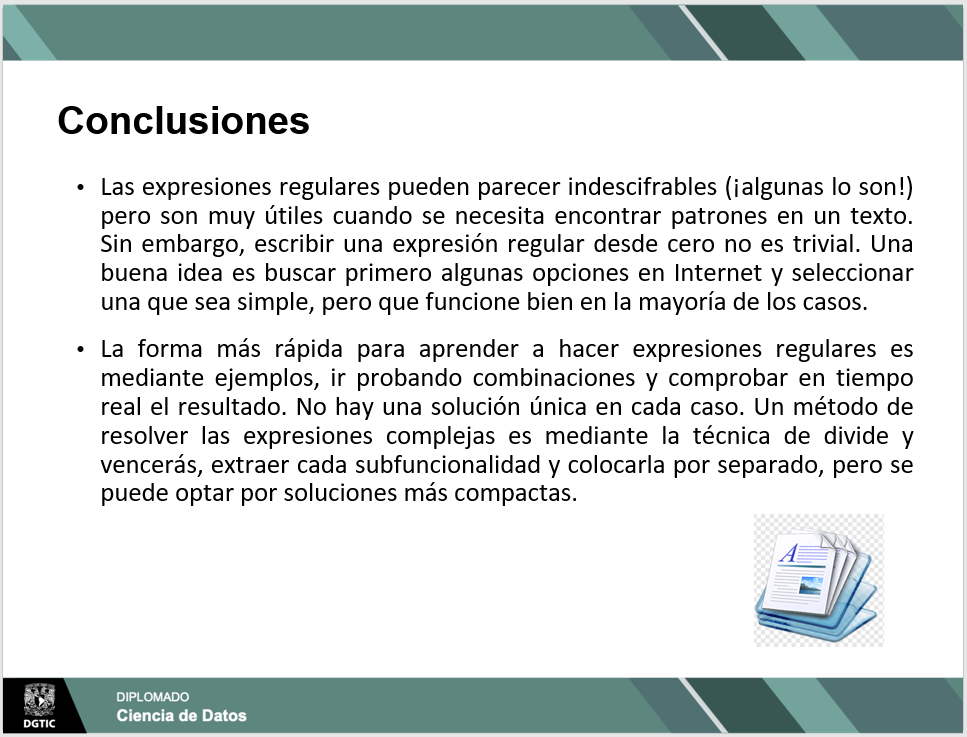